In [1]:
import pandas as pd

# Load the data from the uploaded CSV file
file_path = '../log/tmplog_40Mbps_PIAS_SP.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and column names to understand its structure
data.head(), data.columns


(                       flow id:  first send:  last arrive:        FCT:  \
 0  11:0:11 11:0:41 10099 100 17     2.003913    234.567728  232.570806   
 1  11:0:11 11:0:41 10097 100 17     2.003863    146.710877  144.724041   
 2  11:0:11 11:0:41 10096 100 17     2.003838    350.284524  348.283431   
 3  11:0:11 11:0:41 10093 100 17     2.003762    146.368412  144.381781   
 4  11:0:11 11:0:41 10092 100 17     2.003737    130.411436  128.426431   
 
    origin_pg:  
 0           3  
 1           3  
 2           3  
 3           3  
 4           3  ,
 Index(['flow id:', 'first send:', 'last arrive:', 'FCT:', 'origin_pg:'], dtype='object'))

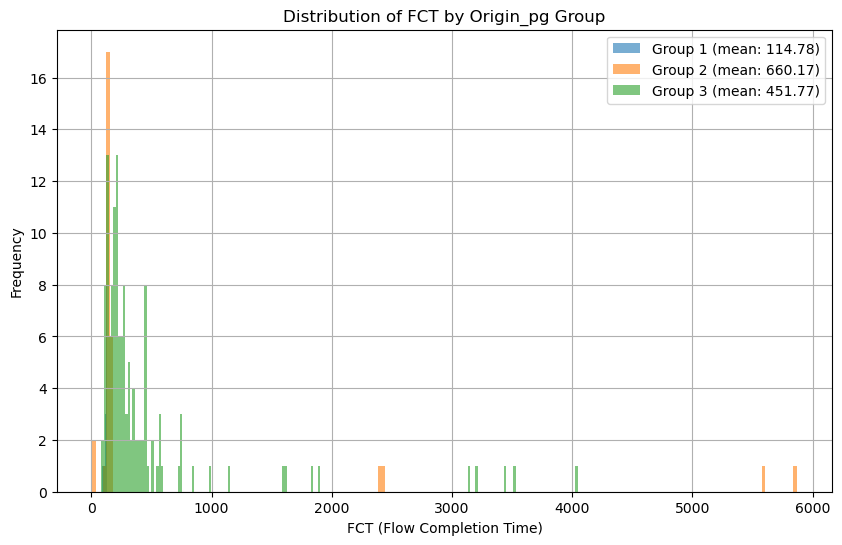

In [2]:
import matplotlib.pyplot as plt

# Group data by 'origin_pg'
grouped_data = data.groupby('origin_pg:')

# Create a figure to hold the plots
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting each group's FCT distribution and mean
for name, group in grouped_data:
    # Compute mean FCT for the group
    mean_fct = group['FCT:'].mean()
    
    # Plot the histogram for the group
    group['FCT:'].hist(bins=200, alpha=0.6, ax=ax, label=f'Group {name} (mean: {mean_fct:.2f})')

# Add labels and title
ax.set_xlabel('FCT (Flow Completion Time)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of FCT by Origin_pg Group')
ax.legend()

# Show the plot
plt.show()


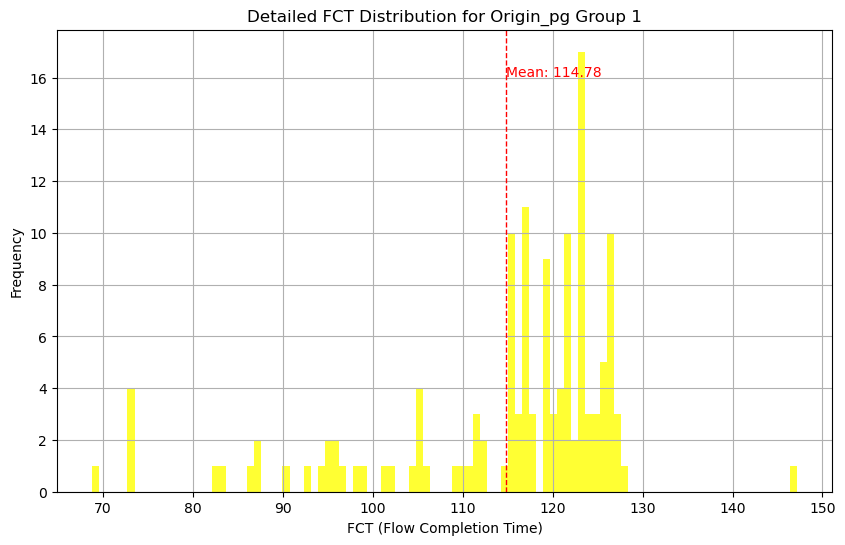

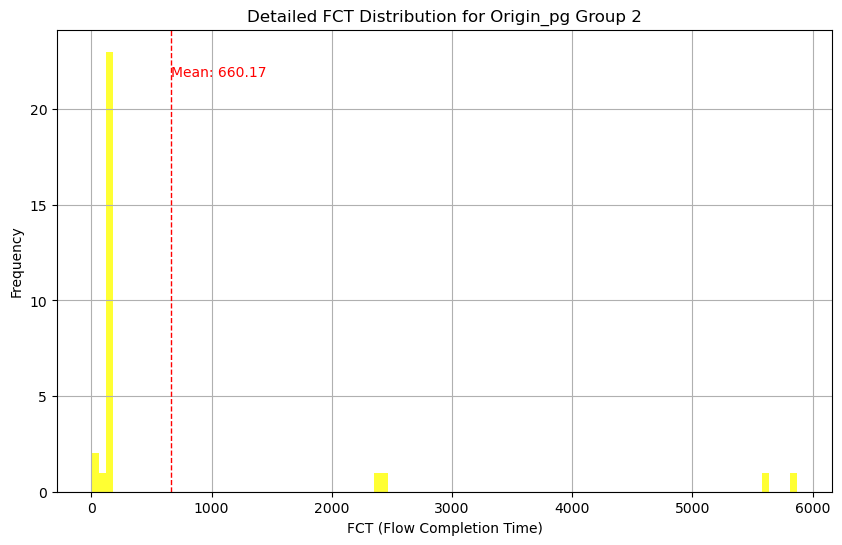

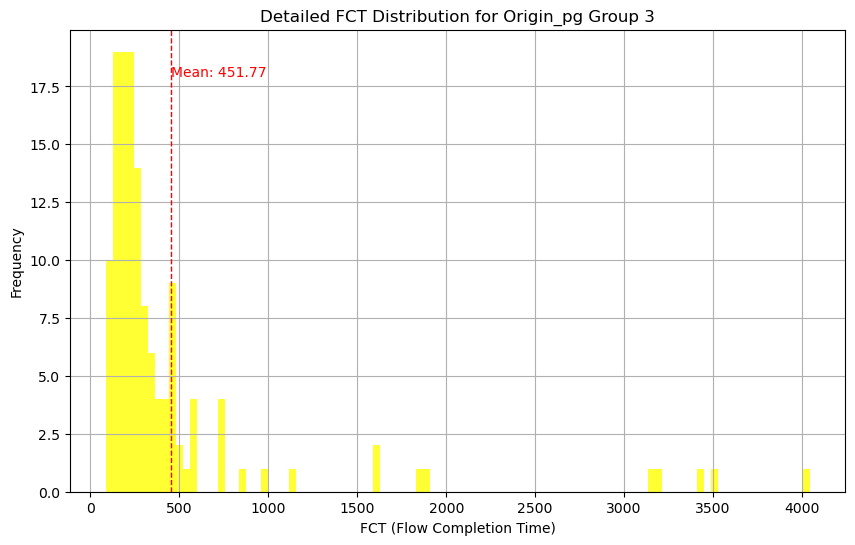

In [3]:
for i in range(1, 4):
    # Extract the data for origin_pg == i
    group_single_data = grouped_data.get_group(i)['FCT:']

    # Create a plot for the detailed histogram of origin_pg == i
    fig, ax = plt.subplots(figsize=(10, 6))
    group_single_data.hist(bins=100, alpha=0.8, color='yellow', ax=ax)  # Using more bins for finer details

    # Mark the mean on the histogram
    mean_fct_group_i = group_single_data.mean()
    ax.axvline(mean_fct_group_i, color='red', linestyle='dashed', linewidth=1)
    ax.text(mean_fct_group_i, ax.get_ylim()[1]*0.9, f'Mean: {mean_fct_group_i:.2f}', color='red')

    # Set titles and labels
    ax.set_title('Detailed FCT Distribution for Origin_pg Group '+str(i))
    ax.set_xlabel('FCT (Flow Completion Time)')
    ax.set_ylabel('Frequency')

    # Show the plot
    plt.show()
